In [1]:
#Import necessary modules
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path

In [3]:
#Use Pandas to read the csv data into a Dataframe.  Then we'll use the .head() function to look at first 5 records 
nba_data = pd.read_csv('C:\\csv_files\\nba_2022-23_all_stats_with_salary.csv', encoding='unicode_escape')
nba_data.head()

,Unnamed:0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [5]:
#Lets modify the 1st column to name it better
nba_data = nba_data.rename(columns={"Unnamed:0": "Id"})
nba_data.head()

,Id,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [7]:
# Since we are interested in player ages, let's examine if any player(s) have missing Age data
null_age = nba_data[nba_data['Age'].isnull()]
null_age

,Id,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP


In [9]:
#No invalid ages, lets look at the head and tail of the data frame
nba_data

,Id,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


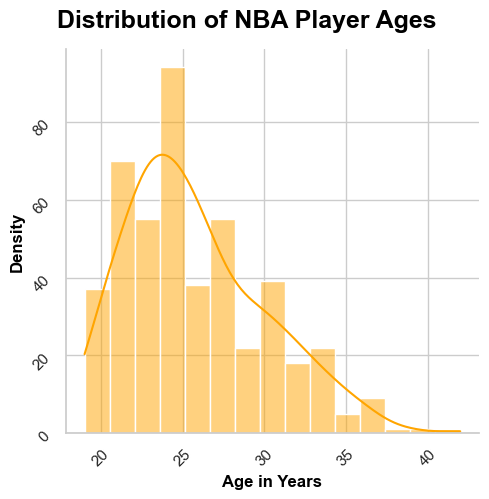

In [11]:
#Looks good.  Let's visualize it with a chart
# Set style
sns.set(style='whitegrid')

# Create the displot with kde
g = sns.displot(nba_data['Age'], kde=True, color='orange')

# Customize the titles
g.fig.suptitle('Distribution of NBA Player Ages', weight='bold', color='black', fontsize=18)
g.fig.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle

# Customize the labels and ticks
g.set_axis_labels('Age in Years', 'Density', weight='bold', color='black')

# Rotate x and y ticks
for label in g.ax.get_xticklabels():
    label.set_rotation(45)

for label in g.ax.get_yticklabels():
    label.set_rotation(45)

# Show the plot
plt.show()